### Câu hỏi: Tốc độ gió (Wind speed) có xu hướng tăng hay giảm khi chất lượng không khí (aqi) xấu đi?

Câu hỏi này sẽ giúp:
- Kiểm tra mối quan hệ giữa tốc độ gió và chỉ số chất lượng không khí.
- Xác định xem tốc độ gió có ảnh hưởng tích cực hay tiêu cực đến chất lượng không khí.

#### 1. Khai báo thư viện

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

#### 2. Chuẩn bị dữ liệu

In [3]:
# Đọc dữ liệu từ file CSV
file_path = "ProcessedData.csv"
data = pd.read_csv(file_path)

# Kiểm tra dữ liệu
data.head()

,Unnamed: 0,timestamp,Temprature (Kelvin),Feels like (Kelvin),Pressure (mb),Humidity (%),Temperature Amplitude,Wind speed (m/s),Wind degree,Wind gust (m/s),...,Weather Description,aqi,co,no,no2,o3,so2,pm2_5,pm10,nh3
0,0,1701388800,301.16,306.75,1011.0,89.0,0.0,0.51,0.0,0.0,...,scattered clouds,5.0,921.25,128.75,42.50,0.0,56.74,246.02,294.09,29.64
1,1,1701392400,301.16,306.75,1011.0,89.0,0.0,0.51,300.0,0.0,...,scattered clouds,5.0,4699.71,109.08,34.62,0.0,42.44,199.75,233.37,22.29
2,2,1701396000,301.16,306.75,1010.0,89.0,0.0,0.51,0.0,0.0,...,scattered clouds,5.0,3791.81,84.94,26.73,0.0,29.80,157.48,177.82,17.23
3,3,1701399600,300.16,304.35,1009.0,94.0,0.0,0.51,330.0,0.0,...,scattered clouds,5.0,3017.43,61.69,20.91,0.0,22.41,121.27,132.87,13.05
4,4,1701403200,299.16,299.16,1009.0,94.0,0.0,0.51,290.0,0.0,...,mist,5.0,2456.67,46.04,17.82,0.0,19.55,96.76,104.39,10.26


#### 3. Phân nhóm theo AQI

Chia dữ liệu thành các nhóm dựa trên chỉ số chất lượng không khí (aqi).

In [14]:
# Kiểm tra các giá trị duy nhất trong cột 'aqi'
print(data['aqi'].unique())

# Gắn nhãn mô tả cho từng mức AQI
aqi_labels = {
    1: 'Good',
    2: 'Moderate',
    3: 'Unhealthy for\nSensitive Groups',
    4: 'Unhealthy',
    5: 'Very Unhealthy'
}
data['aqi_label'] = data['aqi'].map(aqi_labels)

[5. 4. 3. 2. 1.]


#### 4. Tính toán tốc độ gió trung bình cho từng nhóm AQI

In [15]:
# Tính tốc độ gió trung bình theo AQI
wind_speed_by_aqi = data.groupby('aqi')['Wind speed (m/s)'].mean().reset_index()

wind_speed_by_aqi

,aqi,Wind speed (m/s)
0,1.0,4.432565
1,2.0,3.798489
2,3.0,3.076445
3,4.0,2.572841
4,5.0,2.019595


#### 5. Trực quan hóa kết quả

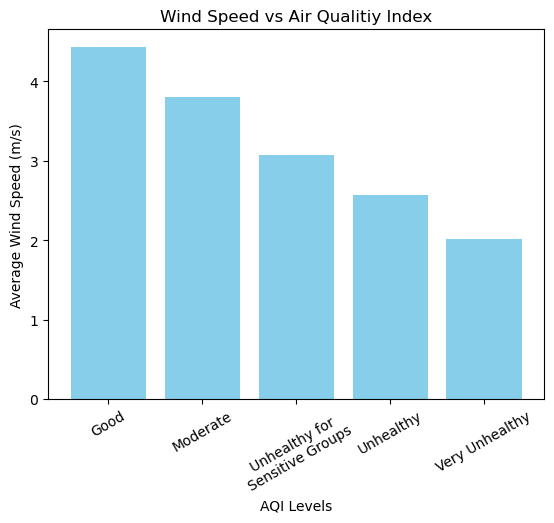

In [18]:
# Biểu đồ cột thể hiện tốc độ gió theo AQI
plt.bar(wind_speed_by_aqi['aqi'], wind_speed_by_aqi['Wind speed (m/s)'], color='skyblue')
plt.xlabel('AQI Levels')
plt.ylabel('Average Wind Speed (m/s)')
plt.title('Wind Speed vs Air Qualitiy Index')
plt.xticks(wind_speed_by_aqi['aqi'], labels=wind_speed_by_aqi['aqi'].map(aqi_labels), rotation=30)
plt.show()

#### 6. Kết luận

- Xu hướng: Tốc độ gió trung bình (Average Wind Speed) có xu hướng giảm dần khi chất lượng không khí (AQI) trở nên xấu hơn.
    + Ở mức AQI "Good", tốc độ gió trung bình cao nhất, vượt mức 4 m/s.
    + Ở mức AQI "Very Unhealthy", tốc độ gió trung bình thấp nhất, dưới 2 m/s.
- Phân tích: Dựa trên biểu đồ, có thể suy luận rằng:
    + Tốc độ gió cao có thể giúp khuếch tán các chất ô nhiễm trong không khí, dẫn đến chất lượng không khí tốt hơn.
    + Tốc độ gió thấp có thể khiến các chất ô nhiễm tích tụ, dẫn đến chất lượng không khí xấu hơn.